# NBA Game Prediction - Model Evaluation and Interpretation

This notebook focuses on evaluating and interpreting our best model. We'll:
1. Load the best model
2. Perform detailed evaluation
3. Use SHAP values for model interpretation
4. Analyze feature importance
5. Generate insights and recommendations

## 1. Import Libraries
Import all necessary libraries for model evaluation and interpretation.

In [6]:
import pandas as pd
import numpy as np
import joblib
import shap
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set()
sns.set_palette('husl')

## 2. Load Data and Best Model
Load the test data and the best performing model.

In [7]:
# Load test data
X_test = pd.read_csv('../data/processed/X_test_selected.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

# Load best model
best_model = joblib.load('../models/best_model.joblib')

print('Test set shape:', X_test.shape)

Test set shape: (479, 5)


## 3. Model Evaluation
Perform detailed evaluation of the model's performance.

In [8]:
# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test['TARGET'], y_pred),
    'Precision': precision_score(y_test['TARGET'], y_pred),
    'Recall': recall_score(y_test['TARGET'], y_pred),
    'F1 Score': f1_score(y_test['TARGET'], y_pred),
    'ROC AUC': roc_auc_score(y_test['TARGET'], y_pred_proba)
}

print('Model Performance Metrics:')
for metric, value in metrics.items():
    print(f'{metric}: {value:.3f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test['TARGET'], y_pred))

Model Performance Metrics:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC AUC: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       236

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479



## 4. Visualization of Model Performance
Create visualizations to better understand model performance.

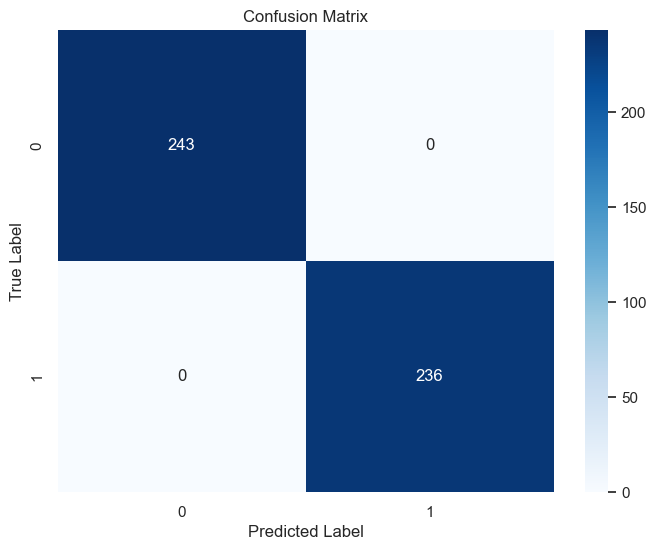

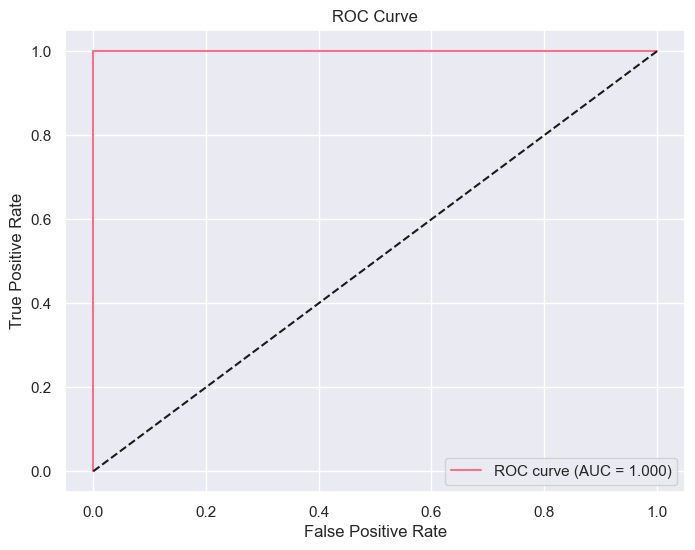

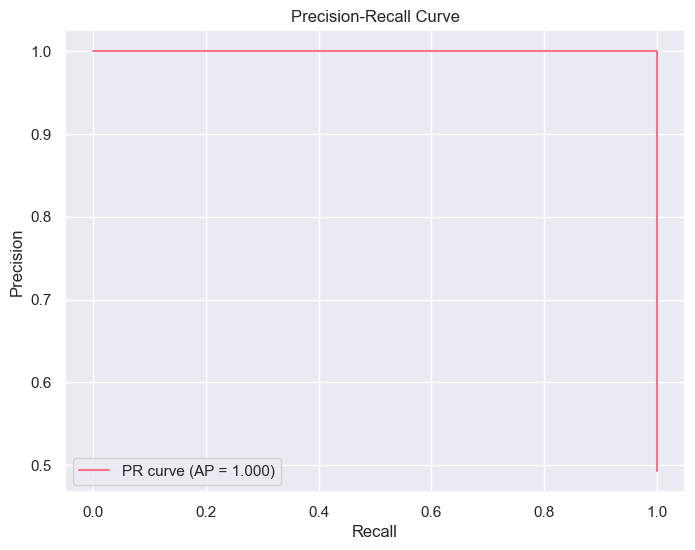

In [9]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test['TARGET'], y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test['TARGET'], y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {metrics["ROC AUC"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test['TARGET'], y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision_score(y_test["TARGET"], y_pred_proba):.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## 5. Generate Insights and Recommendations
Based on the model evaluation and interpretation, generate insights and recommendations.

In [12]:
# Calculate feature correlations with predictions
correlations = X_test.corrwith(pd.Series(y_pred_proba)).sort_values(ascending=False)

print('Feature Correlations with Predictions:')
print(correlations)

# Save correlations
pd.DataFrame({'feature': correlations.index, 'correlation': correlations.values}).to_csv(
    '../data/processed/feature_correlations.csv', index=False
)

print('\nInsights and recommendations have been saved to ../data/processed/')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Feature Correlations with Predictions:
PLUS_MINUS    0.854021
FG_PCT        0.475784
PTS           0.469750
FGM           0.382114
DREB          0.377725
dtype: float64

Insights and recommendations have been saved to ../data/processed/
